# ENSEMBLED

Ask multiple people, make them choose between A and B ... N Say asked 20 people, choose the one which response has majority or most occurrence.

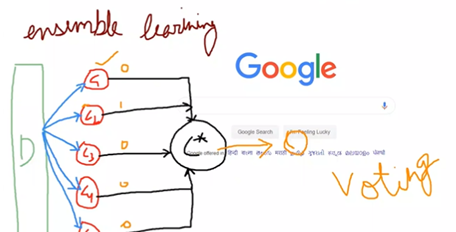

Train multiple classifiers, they can be of any type, like C1:SVM, C2:DT, C3:SVM, C4:LogReg etc. , they may be same type models but may have different parameters. They each produce results or outcomes based on the data they are given and the training they are given and the output of each is used for voting and most voted output is the considered final output.


These C1, C2…Cn classifiers are called “weak classifiers”, while C* is called “Strong Classifiers” having greater power, more precision and more accuracy.

Also Error is less of C* than weak classifiers.


Has two types : 

1. Bagging 

2. Boosting  

## BOOSTING

Train weak classifiers sequentially. Say dataset has 5 subparts, each Di has an assigned weight to it Wi. Say we have models Mi.


Take a subset od dataset say D1,D2,D3 and then train M1 on it. Now provide full dataset to M1 for predictions, if it has wrongly classified D2 and D5 then increase weight of those wrongly classified (i.e. W2, W5).

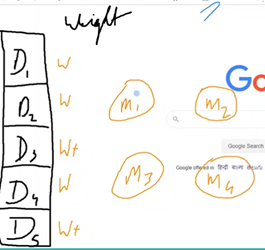
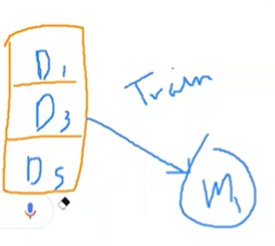

Now select model M2, those rows with higher weights have higher probability of coming for training part of M2. Say D5, D3, D1 come. Train. Then ask M2 to predict on complete dataset. Say D5 got predicted wrongly so again W5++.

Select model M3, data subsets for training : D5,D3,D2. Train, Predict on all. Suppose this time correct predictions for all. So can stop. But not every time correct predictions will be generated.


With these Mi trained (weak classifiers), to use the model, we create a C* (strong classifier) and give the input to all the Mi, again voting, and output the majority .

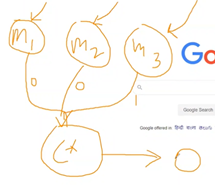

**Types**

1. Ada Boost

2. G Boost

3. XG Boost  ( very strong , most widely used) 

4. Cat Boost

5. Light Gradient Boost

https://www.kaggle.com/hesh97/titanicdataset-traincsv

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d hesh97/titanicdataset-traincsv

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 39.4MB/s]


In [ ]:
!unzip /content/titanicdataset-traincsv.zip

Archive:  /content/titanicdataset-traincsv.zip
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

### PREPROCESSING

In [ ]:
# PREPROCESSING

# Fetch data
df = pd.read_csv("/content/train.csv")

# Remove unnecessary columns
l1 = ['PassengerId', 'Ticket', 'Cabin']
df.drop(l1, axis=1, inplace=True)

# Getting Designation from names
temp = df["Name"].unique()
st = []    
j = 1
for i in temp:
  a = i.split()   
  for k in a :
    if '.' in k:
      st.append(k)
      break

st = np.array(st)
df["New_Name"] = st

# Dropping name after preprocessing
l2 = ["Name"]
df.drop(l2, axis=1, inplace=True)

# Handling NAN
emb = list(df["Embarked"].mode()) [0]
df["Age"].fillna (df["Age"].mean(), inplace=True)
df["Embarked"].fillna(emb, inplace=True)

# Label Encoding
le_sex = LabelEncoder()
le_emb = LabelEncoder()
le_new_name = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_emb.fit_transform(df["Embarked"])
df["New_Name"] = le_new_name.fit_transform(df["New_Name"])

# Deviding train and testing dataset
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.1)

In [ ]:
# Normalizing
sc_x = StandardScaler()
xtrain = sc_x.fit_transform (xtrain)
xtest = sc_x.transform (xtest)

### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaclf1 = AdaBoostClassifier(n_estimators=1)
adaclf1.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1, random_state=None)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

n_estimators=50 : no of weak classifiers
by default uses DecisionTrees as classifiers with depth=1. these are called "Stambed trees"

algorithm : SAMME, SAMME.R(default)

no n_job parameter as not parallel

In [ ]:
adapred1 = adaclf1.predict(xtest)
print(adaclf1.score(xtrain, ytrain))
print(adaclf1.score(xtest, ytest))
print(confusion_matrix(adapred1, ytest))

0.7865168539325843
0.7888888888888889
[[41  9]
 [10 30]]


In [ ]:
adaclf2 = AdaBoostClassifier(n_estimators=5)
adaclf2.fit(xtrain, ytrain)
adapred2 = adaclf2.predict(xtest)
print(adaclf2.score(xtrain, ytrain))
print(adaclf2.score(xtest, ytest))
print(confusion_matrix(adapred2, ytest))

0.7865168539325843
0.8333333333333334
[[41  5]
 [10 34]]


In [ ]:
adaclf3 = AdaBoostClassifier(n_estimators=20)
adaclf3.fit(xtrain, ytrain)
adapred3 = adaclf3.predict(xtest)
print(adaclf3.score(xtrain, ytrain))
print(adaclf3.score(xtest, ytest))
print(confusion_matrix(adapred3, ytest))

0.8252184769038702
0.8555555555555555
[[44  6]
 [ 7 33]]


In [ ]:
adaclf4 = AdaBoostClassifier(n_estimators=50)
adaclf4.fit(xtrain, ytrain)
adapred4 = adaclf4.predict(xtest)
print(adaclf4.score(xtrain, ytrain))
print(adaclf4.score(xtest, ytest))
print(confusion_matrix(adapred4, ytest))
print(adaclf4.fit(xtrain, ytrain))
# decreased, hypertune it now

0.83645443196005
0.8111111111111111
[[42  8]
 [ 9 31]]
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


In [ ]:
adaclf5 = AdaBoostClassifier(n_estimators=50, learning_rate=0.6)
adaclf5.fit(xtrain, ytrain)
adapred5 = adaclf5.predict(xtest)
print(adaclf5.score(xtrain, ytrain))
print(adaclf5.score(xtest, ytest))
print(confusion_matrix(adapred5, ytest))

0.8252184769038702
0.8111111111111111
[[41  7]
 [10 32]]


In [ ]:
adaclf6 = AdaBoostClassifier(n_estimators=50, learning_rate=0.3)
adaclf6.fit(xtrain, ytrain)
adapred6 = adaclf6.predict(xtest)
print(adaclf6.score(xtrain, ytrain))
print(adaclf6.score(xtest, ytest))
print(confusion_matrix(adapred6, ytest))

0.8239700374531835
0.8222222222222222
[[42  7]
 [ 9 32]]


### XG Boost

Extreme Gradient Boosting Classifier

not there in sklearn
https://xgboost.readthedocs.io/en/release_0.81/build.html

Need to install it from installation guide.

supports parallel processing


In [ ]:
# pip3 install xgboost
from xgboost import XGBClassifier

In [ ]:
xclf1 = XGBClassifier(n_estimators=1, n_jobs=-1)
xclf1.fit(xtrain, ytrain)
# booster='gbtree' so a tree is being used

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xpred1 = xclf1.predict(xtest)
print(xclf1.score(xtrain, ytrain))
print(xclf1.score(xtest, ytest))
print(confusion_matrix(xpred1, ytest))

0.8264669163545568
0.8333333333333334
[[44  8]
 [ 7 31]]


In [ ]:
xclf2 = XGBClassifier(n_estimators=5, n_jobs=-1)
xclf2.fit(xtrain, ytrain)
xpred2 = xclf2.predict(xtest)
print(xclf2.score(xtrain, ytrain))
print(xclf2.score(xtest, ytest))
print(confusion_matrix(xpred2, ytest))

0.8289637952559301
0.8444444444444444
[[44  7]
 [ 7 32]]


In [ ]:
xclf3 = XGBClassifier(n_estimators=15, n_jobs=-1)
xclf3.fit(xtrain, ytrain)
xpred3 = xclf3.predict(xtest)
print(xclf3.score(xtrain, ytrain))
print(xclf3.score(xtest, ytest))
print(confusion_matrix(xpred3, ytest))

0.8451935081148564
0.8444444444444444
[[46  9]
 [ 5 30]]


In [ ]:
xclf4 = XGBClassifier(n_estimators=15, n_jobs=-1, learning_rate=0.3) # max_Depth= 3
xclf4.fit(xtrain, ytrain)
xpred4 = xclf4.predict(xtest)
print(xclf4.score(xtrain, ytrain))
print(xclf4.score(xtest, ytest))
print(confusion_matrix(xpred4, ytest))

# pretty good as close accuracy scores

0.8614232209737828
0.8777777777777778
[[46  6]
 [ 5 33]]


In [ ]:
xclf5 = XGBClassifier(n_estimators=15, n_jobs=-1, learning_rate=0.6) # max_Depth= 3
xclf5.fit(xtrain, ytrain)
xpred5 = xclf5.predict(xtest)
print(xclf5.score(xtrain, ytrain))
print(xclf5.score(xtest, ytest))
print(confusion_matrix(xpred5, ytest))

0.8764044943820225
0.8777777777777778
[[46  6]
 [ 5 33]]


In [ ]:
xclf6 = XGBClassifier(n_estimators=50, n_jobs=-1, learning_rate=0.6) # max_Depth= 3
xclf6.fit(xtrain, ytrain)
xpred6 = xclf6.predict(xtest)
print(xclf6.score(xtrain, ytrain))
print(xclf6.score(xtest, ytest))
print(confusion_matrix(xpred6, ytest))
# overfitting may start as not enough data and 50 trees is a big no

0.9238451935081149
0.8666666666666667
[[45  6]
 [ 6 33]]


In [ ]:
xclf7 = XGBClassifier(n_estimators=25, n_jobs=-1, learning_rate=0.6) # max_Depth= 3
xclf7.fit(xtrain, ytrain)
xpred7 = xclf7.predict(xtest)
print(xclf7.score(xtrain, ytrain))
print(xclf7.score(xtest, ytest))
print(confusion_matrix(xpred7, ytest))

0.8976279650436954
0.8666666666666667
[[45  6]
 [ 6 33]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(xpred7, ytest))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.85      0.85      0.85        39

    accuracy                           0.87        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.87      0.87      0.87        90



In [ ]:
print(confusion_matrix(xpred5, ytest))
print(classification_report(xpred5, ytest))

[[46  6]
 [ 5 33]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        52
           1       0.85      0.87      0.86        38

    accuracy                           0.88        90
   macro avg       0.87      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [ ]:
# f1 
(2*0.90*0.88) / (0.90+0.88) , (2*0.85*0.87) / (0.85+0.87)

(0.8898876404494382, 0.8598837209302325)

### K FOLD CROSS VALIDATION


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score (xclf7, xtrain, ytrain, cv=3, n_jobs=-1)

array([0.80524345, 0.82771536, 0.83146067])

In [ ]:
cross_val_score (xclf7, xtrain, ytrain, cv=3, n_jobs=-1).mean()

0.8214731585518104

In [ ]:
cross_val_score (xclf7, xtrain, ytrain, cv=5, n_jobs=-1).mean()

0.8102950310559006

## Grid Search

for hyperparameter tuning

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

requires parameter grid as a dictionary

In [ ]:
from sklearn.model_selection import GridSearchCV

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
parameters = {
    "learning_rate" : [0.1, 0.01, 0.3, 0.5, 0.6],
    "max_dept" : [1,2,3,4],
    "n_estimators" : [5,10,15,20,50]
}

clf_grid = GridSearchCV(estimator = xclf7, param_grid=parameters, n_jobs=-1, cv=3)

In [ ]:
clf_grid.fit(xtrain , ytrain)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.6, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=25, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.3, 0.5, 0.6],
                         'max_dept': [1, 2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 5

In [ ]:
clf_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_dept=1, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=15, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf_grid.best_params_

{'learning_rate': 0.6, 'max_dept': 1, 'n_estimators': 15}

In [ ]:
clf_grid.best_score_

0.82896379525593